<a href="https://colab.research.google.com/github/MustafaJ98/ECSE415_Computer_Vision/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 415 Intro to Computer Vision

Assignemt 1

Author: Mustafa Javed

Images provided by Prof James J. Clark



In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np

#mount drive
from google.colab import drive
drive.mount('/content/drive')

#define images path. Edit this path according to the folder where images are stored
path = '/content/drive/My Drive/ECSE 415/Assignment 1/images/'


Mounted at /content/drive


## 1. Binary Thresholding###

### 1.1 Simple Binary Thresholding ###


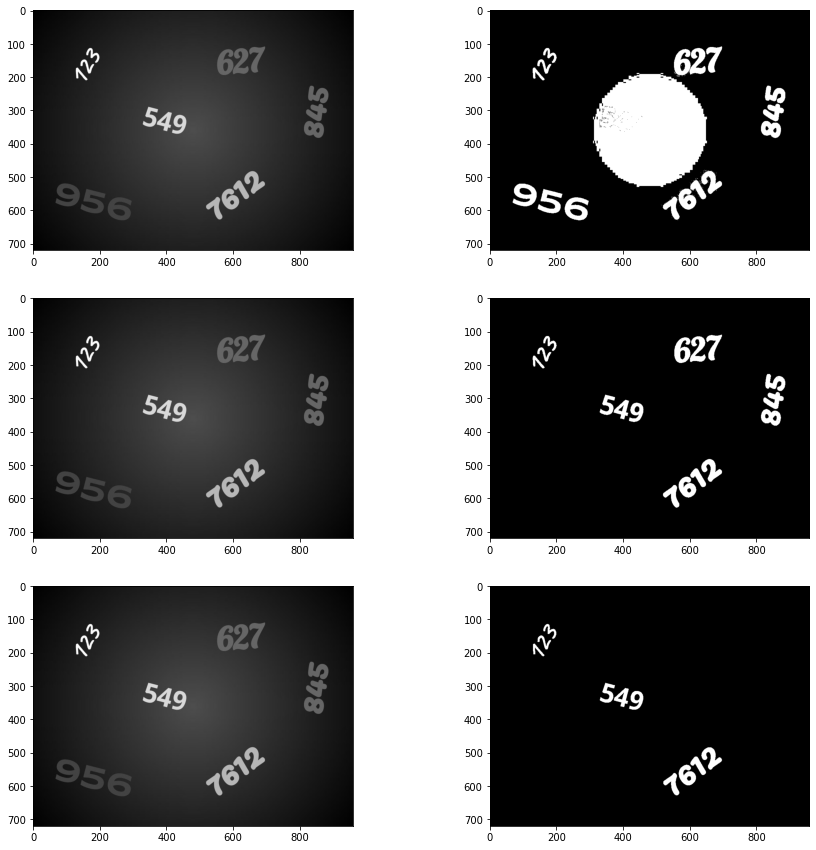

In [2]:
# read image into variable. Apply a grayscale filter
numbers = img.imread(path + '/numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

# A method that takes an image and threshold and apply simple binary thrsholding
def simple_binary_thresholding (image, threshold):
  resolution = image.shape
  imagetemp = np.zeros_like(image)      
  imagetemp[image > threshold] = 255    #if a pixel value is greater threshold make it 255
  return imagetemp   

plt.figure(figsize=(15,15))   # Set figure size for plotting

# plot raw images for comparison
plt.subplot(321)
plt.imshow(numbers)
plt.subplot(323)
plt.imshow(numbers)
plt.subplot(325)
plt.imshow(numbers)

# plot images with thresholding at 55, 90, 150
plt.subplot(322)
plt.imshow( simple_binary_thresholding(numbersGray, 55) , cmap= 'gray')

plt.subplot(324)
plt.imshow( simple_binary_thresholding(numbersGray, 90) , cmap= 'gray')

plt.subplot(326)
plt.imshow( simple_binary_thresholding(numbersGray, 150) , cmap= 'gray')




###  Inverse Binary Thresholding ###

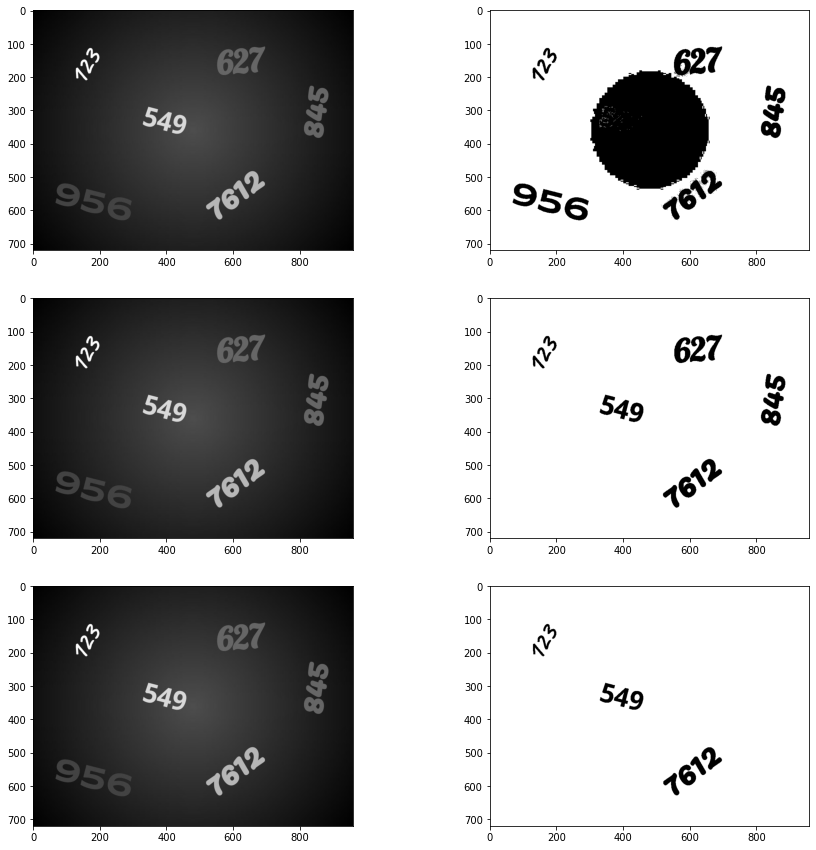

In [3]:
# read image into variable. Apply a grayscale filter
numbers = img.imread(path + 'numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

# A method that takes an image and threshold and applies inverse binary thrsholding
def inverse_binary_thresholding (image, threshold):
  resolution = image.shape
  imagetemp = np.zeros_like(image)   
  imagetemp[image < threshold] = 255   #if a pixel value is less than threshold make it 255
  return imagetemp

plt.figure(figsize=(15,15))

# plot raw images for comparison
plt.subplot(321)
plt.imshow(numbers)
plt.subplot(323)
plt.imshow(numbers)
plt.subplot(325)
plt.imshow(numbers)

# plot images with thresholding at 55, 90, 150
plt.subplot(322)
plt.imshow( inverse_binary_thresholding(numbersGray, 55) , cmap= 'gray')
plt.subplot(324)
plt.imshow( inverse_binary_thresholding(numbersGray, 90) , cmap= 'gray')
plt.subplot(326)
plt.imshow( inverse_binary_thresholding(numbersGray, 150) , cmap= 'gray')


**Write your observations about thresholded images at different thresholds. How many and which numbers are segmented at each threshold?** 

As the threshold increases the digits becomes more clear from background until the digits start to disappear. For the thresold of 55, there is a spot in the center of image. The spot disappears at 90.

* At threshold 55, the following 5 digits are segmented: 123, 627, 845, 7612, 956. 
* At threshold 90, the following 5 digits are segmented: 123, 627, 845, 7612, 549.
* At threshold 150, the following 3 digits are segmented: 123, 549, 7612.

### 1.3 Window Binary Thresholding ###

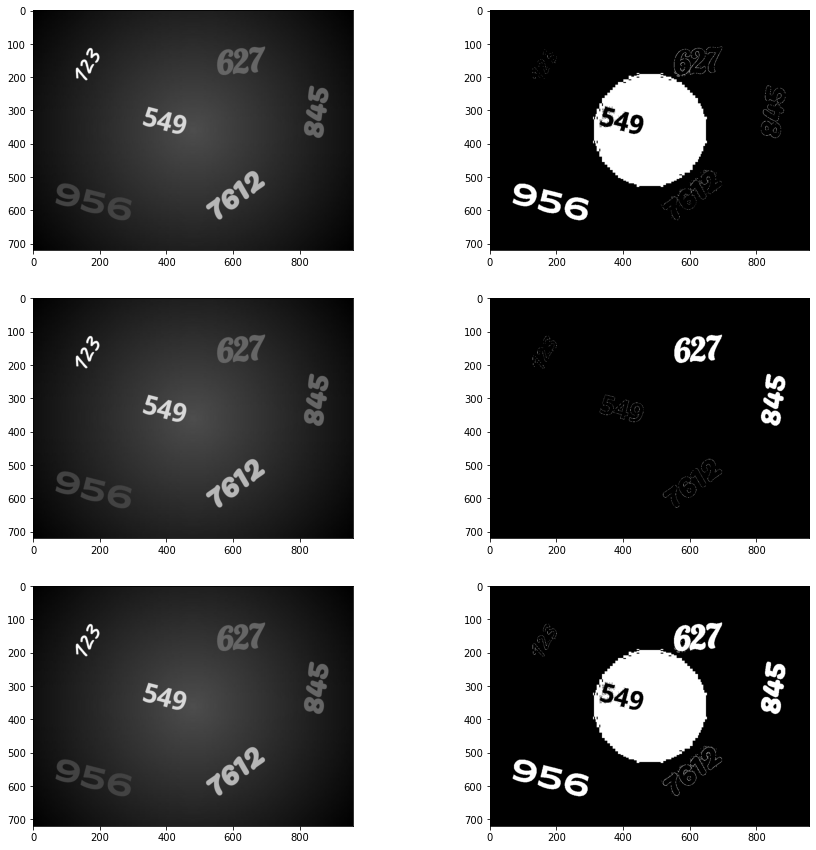

In [4]:
# read image into variable. Apply a grayscale filter
numbers = img.imread(path + 'numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

# A method that takes an image and two thresholds and apply window binary thrsholding ( T2 = upper threshold, T1 = lower threshold )
def window_binary_thresholding (image, T1, T2):

  imagetemp = np.zeros_like(image)
  imagetemp[ (image > T1)  & (image < T2) ] = 255 #if a pixel value is between two thresholds make it 255
  return imagetemp

# plot raw images for comparison
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.imshow(numbers)
plt.subplot(323)
plt.imshow(numbers)
plt.subplot(325)
plt.imshow(numbers)

# plot images with thresholding between 55, 90, 150
plt.subplot(322)
plt.imshow( window_binary_thresholding(numbersGray, 55, 90) , cmap= 'gray')

plt.subplot(324)
plt.imshow( window_binary_thresholding(numbersGray, 90, 150) , cmap= 'gray')

plt.subplot(326)
plt.imshow( window_binary_thresholding(numbersGray, 55, 150) , cmap= 'gray')


**Write your observations. How many and which numbers are segmented at each threshold?**

The lower threshold of the windw allows to filter less intense pixels and the upper treshold allows to limit the intensity of pixels.

* In the window of 55 and 90, the following single digit is segmented: 956. we can see the digit that has comparatively lower intensity. The spot is visible since its pixels have a low intensity.
* In the window of  90 and 150, the following 2 digits are segmented: 627, 845. The window allows medium range of pixel intensity to light up. Therefore, the digits that are bright but not too bright are displayed.  
* At window of 55 and 150, the following 3 digits are segmented: 627, 845, 956. This wide window allows low and medium intensity to pass but limits high intensity.

### 1.4 Desired output


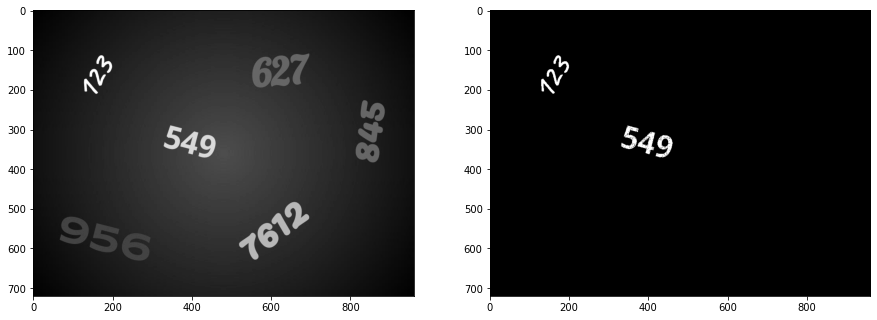

In [5]:
# read image into variable. Apply a grayscale filter
numbers = img.imread(path + 'numbers.jpg')
numbersGray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

# plot raw images for comparison
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(numbersGray, cmap = 'gray')

# plot images with thresholding between 55, 90, 150
plt.subplot(122)
plt.imshow( window_binary_thresholding(numbersGray, 210, 260) , cmap= 'gray')

The digits 123 and 549 are of high intensity compared to the other digits. 
* Trying the threshold window of 100 and 150 gives digit 627 and 845. (need to increase range to get brighter pixels)
* Trying the threshold window of 100 and 260 gives all digits. (need to increase lower threshold to limit dimmer digits)
* Trying the threshold window od 210 and and 260 gives the desired digits. 

## 2 Denoising ##

###2.1 Denoising using a 5x5 Gaussian filter with variance equal to 2. ##
* Image: Lighthouse.png
* Noise Type: Gaussian
* Filter Type: Gaussian Blur

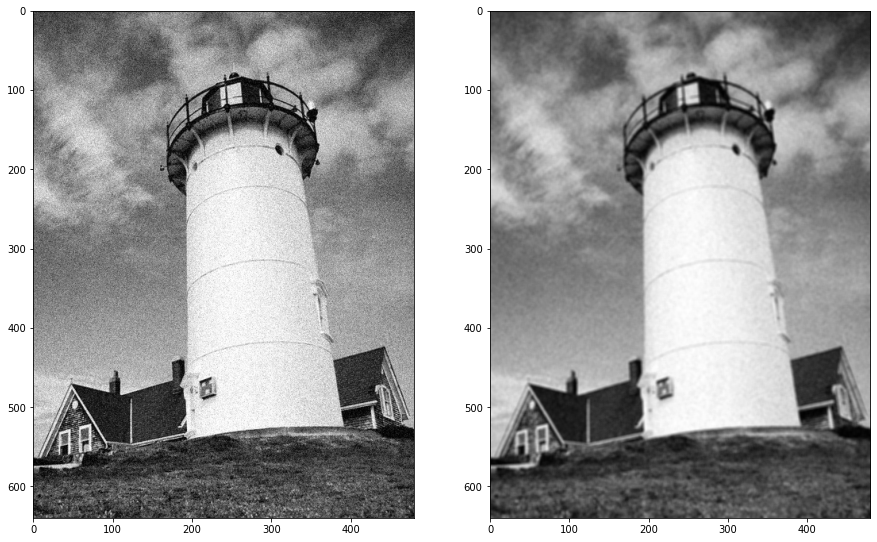

In [6]:
# read image into variable. Apply a grayscale filter
gaussian_lighthouse = img.imread('/content/drive/My Drive/ECSE 415/Assignment 1/images/gaussian_lighthouse.png')
gray2_1 = cv2.cvtColor(gaussian_lighthouse, cv2.COLOR_RGB2GRAY)

#apply a cv2 gaussian blur filter
image2_1 = cv2.GaussianBlur( gray2_1, (5,5) , 2)

#plot images
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_1, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_1, cmap = 'gray')

###2.2 Denoising using a 5x5 box filter ##
* Image: Lighthouse.png
* Noise Type: Gaussian
* Filter Type: Box Filter

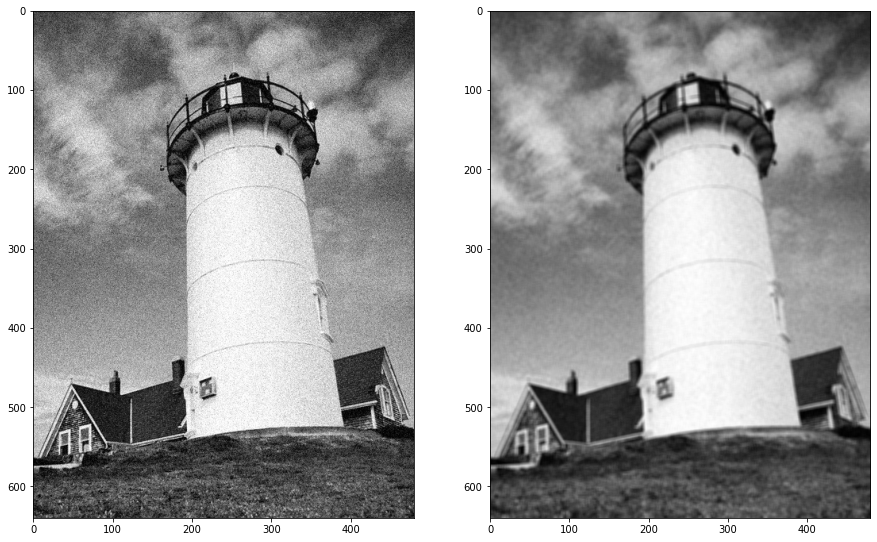

In [7]:
# read image into variable. Apply a grayscale filter
gaussian_lighthouse = img.imread(path + 'gaussian_lighthouse.png')
gray2_2 = cv2.cvtColor(gaussian_lighthouse, cv2.COLOR_RGB2GRAY)

#apply box filter
image2_2 = cv2.blur(gray2_2, (5,5))

#plot images
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_2, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_2, cmap = 'gray')

### 2.3 PSNR ###
Gaussian filtering gives us a higher PSNR and a better result.


In [8]:
lighthouse_clean = img.imread(path + 'gaussian_lighthouse.png')
lighthouse_clean = cv2.cvtColor(lighthouse_clean, cv2.COLOR_RGB2GRAY)

PSNR_2_1 = cv2.PSNR(lighthouse_clean,image2_1)
PSNR_2_2 = cv2.PSNR(lighthouse_clean,image2_2)

print('The PSNR of gaussian blur in 2.1 is ' + str(PSNR_2_1))
print('The PSNR of box filter in 2.2 is ' + str(PSNR_2_2))

The PSNR of gaussian blur in 2.1 is 70.58066317136358
The PSNR of box filter in 2.2 is 70.13684282704051


###2.4 Denoising using a 5x5 Gaussian filter with variance equal to 2. ##
* Image: saltandpepper_lighthouse.png
* Noise Type: Salt and pepper
* Filter Type: Gaussian Blur

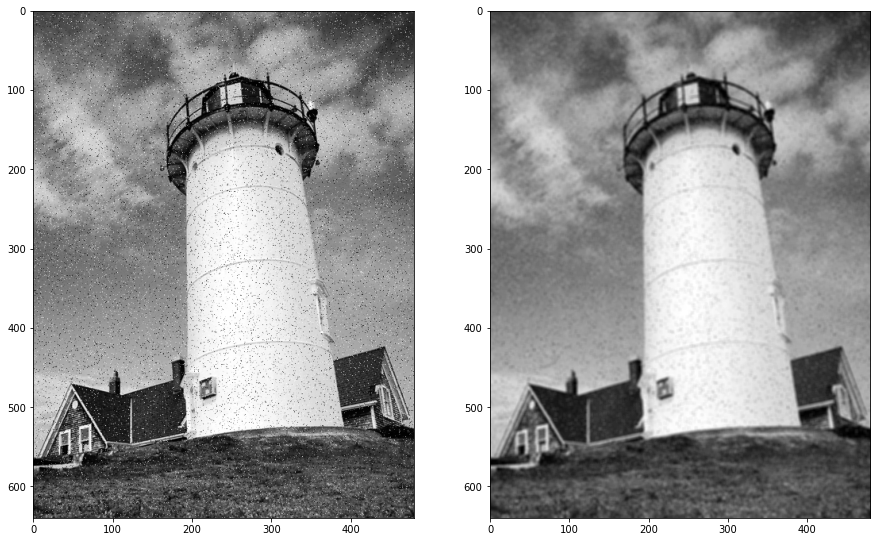

In [9]:
# read image into variable. Apply a grayscale filter
saltandpepper_lighthouse = img.imread(path +'saltandpepper_lighthouse.png')
gray2_4 = cv2.cvtColor(saltandpepper_lighthouse, cv2.COLOR_RGB2GRAY)

#apply a cv2 gaussian blur filter
image2_4 = cv2.GaussianBlur( gray2_4, (5,5) , 2)

#plot images
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_4, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_4, cmap = 'gray')


###2.5 Denoising using a 5x5 Median Filter ##
* Image: saltandpepper_lighthouse.png
* Noise Type: Salt and pepper
* Filter Type: Median

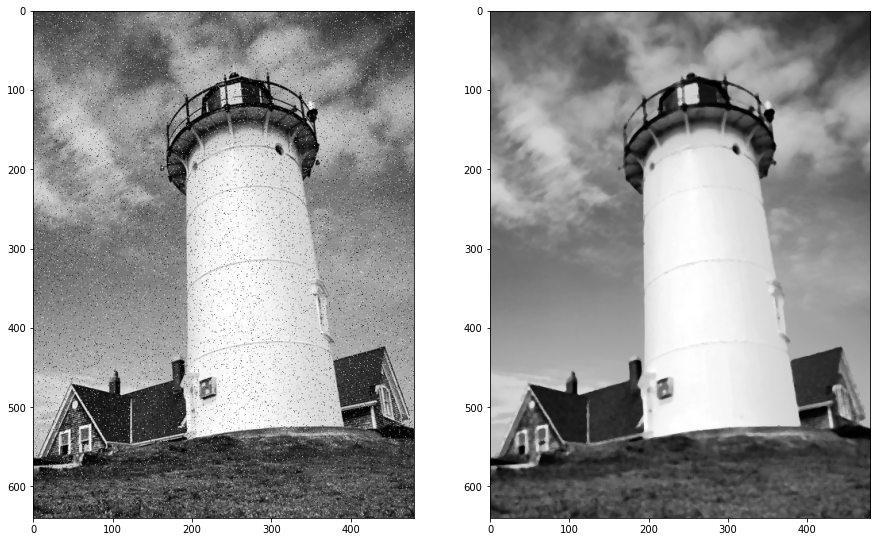

In [10]:
# read image into variable. Apply a grayscale filter
saltandpepper_lighthouse = img.imread(path + 'saltandpepper_lighthouse.png')
gray2_5 = cv2.cvtColor(saltandpepper_lighthouse, cv2.COLOR_RGB2GRAY)

#apply a cv2 median blur filter
image2_5 = cv2.medianBlur( gray2_5, 5)

#plot images
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(gray2_5, cmap = 'gray')

plt.subplot(122)
plt.imshow(image2_5, cmap = 'gray')


### 2.6 PSNR ###

The median blur gives a higher PSNR therfore median filter is better at removing salt and pepper noise as visible from images.

In [11]:
# read image into variable. Apply a grayscale filter
lighthouse_clean = img.imread(path + 'gaussian_lighthouse.png')
lighthouse_clean = cv2.cvtColor(lighthouse_clean, cv2.COLOR_RGB2GRAY)

PSNR_2_4 = cv2.PSNR(lighthouse_clean,image2_4)
PSNR_2_5 = cv2.PSNR(lighthouse_clean,image2_5)

print('The PSNR of gauusian blur in 2.4 is ' + str(PSNR_2_4))
print('The PSNR of median blur in 2.5 is ' + str(PSNR_2_5))

The PSNR of gauusian blur in 2.4 is 70.05473512492844
The PSNR of median blur in 2.5 is 70.31434111630031


## 3. Sobel Edge Detector##

In [12]:

# sobelFilter method takes an image and kernel size as arguemts
# It then applies openCV sobel filters in x and y direction
# The magnitude and phase are computed
# applies a threshold filter to the images
# IT then plots the orignal image, filtered image in X direction, filtered image in Y direction,
# magnitude image and the phase image.

def sobelFilter(image, kernelSize, T):
  I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=kernelSize)
  I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=kernelSize)

  I_m = cv2.magnitude(I_x, I_y)
  I_p = cv2.phase(I_x, I_y)
  
  #apply thresholding according to argument T
  threshM = (T/100)*np.amax(I_m)
  threshP = (T/100)*np.amax(I_p)
  
  ret, I_m = cv2.threshold(I_m, threshM, 255, cv2.THRESH_BINARY)
  ret, I_p = cv2.threshold(I_p, threshP, 255, cv2.THRESH_BINARY) 


  plt.figure(figsize=(10, 10))
  plt.subplot(121), plt.imshow(I_m, cmap="gray")
  plt.title("I_m" + ", K = " + str(kernelSize) + ", T = " + str(T) ), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(I_p, cmap="gray")
  plt.title("I_p" + ", K = " + str(kernelSize) + ", T = " + str(T)), plt.xticks([]), plt.yticks([])
  plt.show()
  print('-------------------------------------------------------------------------')
  print('-------------------------------------------------------------------------')



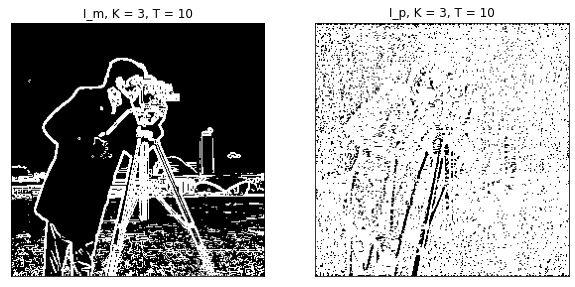

-------------------------------------------------------------------------
-------------------------------------------------------------------------


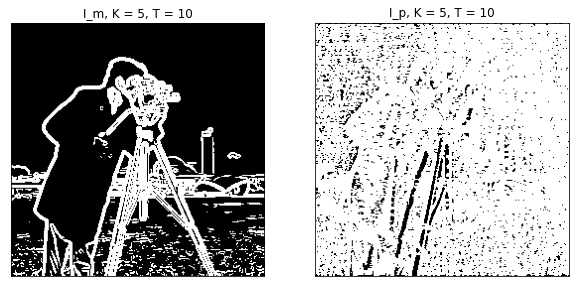

-------------------------------------------------------------------------
-------------------------------------------------------------------------


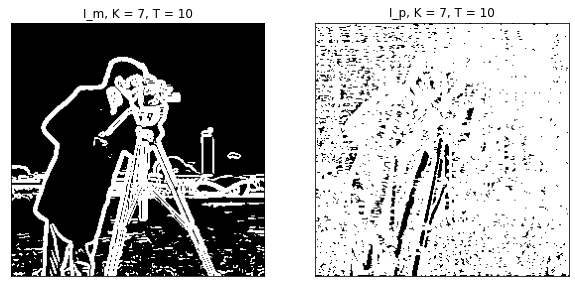

-------------------------------------------------------------------------
-------------------------------------------------------------------------


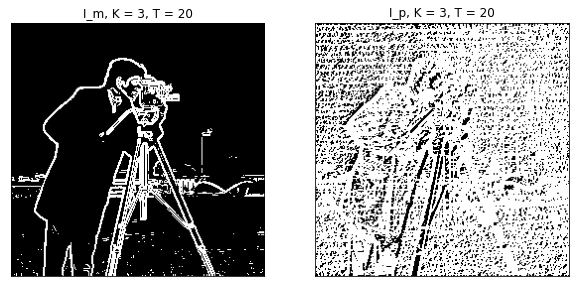

-------------------------------------------------------------------------
-------------------------------------------------------------------------


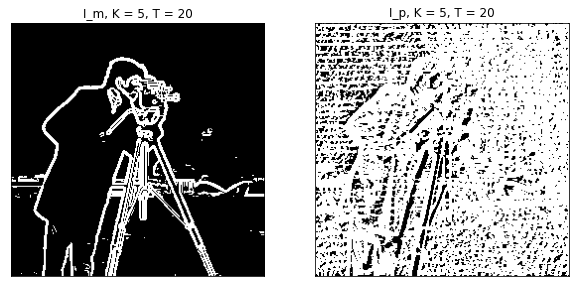

-------------------------------------------------------------------------
-------------------------------------------------------------------------


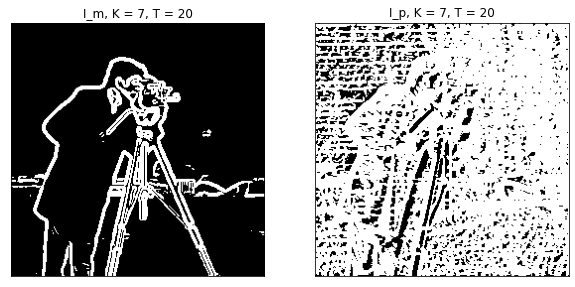

-------------------------------------------------------------------------
-------------------------------------------------------------------------


In [13]:
  
# read image to cameraman
cameraman = img.imread(path + 'cameraman.png')

#NOTE: image is already greyscale

sobelFilter(cameraman,3, 10)
sobelFilter(cameraman,5, 10)
sobelFilter(cameraman,7, 10)
sobelFilter(cameraman,3, 20)
sobelFilter(cameraman,5, 20)
sobelFilter(cameraman,7, 20)

### Comment on the effect of filter size on the output. ###

As the kernel size increases, we get cleaner edges, that is to say less noise is detected as edge. However the edges become thicker. Increasing the threshold helps isolate prominant edges and filter out edges caused by noise.


### 3.2 Sobel Filter and Denoising ###


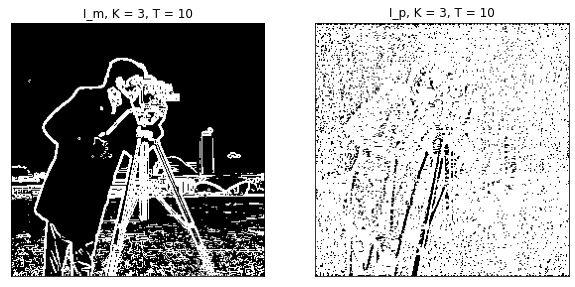

-------------------------------------------------------------------------
-------------------------------------------------------------------------


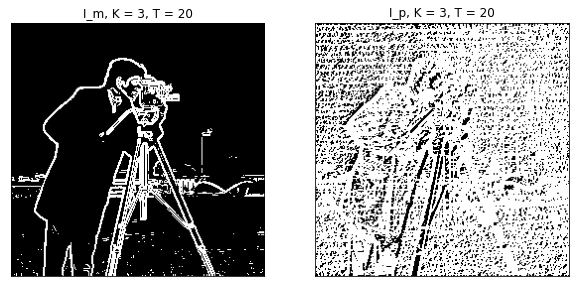

-------------------------------------------------------------------------
-------------------------------------------------------------------------


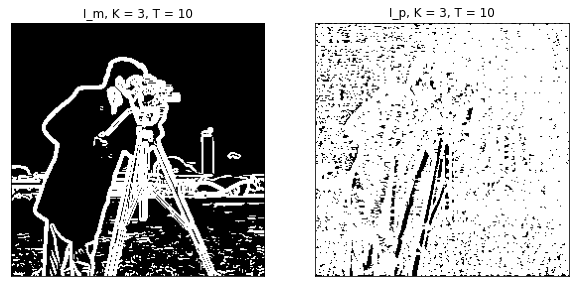

-------------------------------------------------------------------------
-------------------------------------------------------------------------


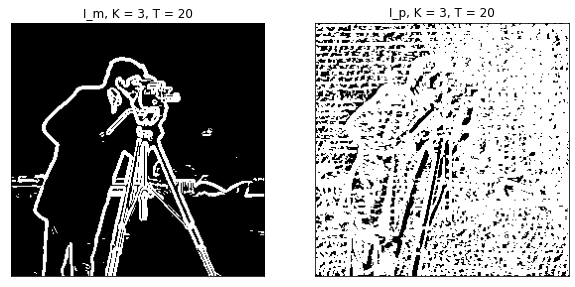

-------------------------------------------------------------------------
-------------------------------------------------------------------------


In [14]:
# read image to cameraman
gaussian_cameraman = img.imread(path + 'cameraman.png')

#NOTE: image is already greyscale

#apply a cv2 box blur filter
filtered_image = cv2.blur(gaussian_cameraman, (3,3))


sobelFilter(gaussian_cameraman,3, 10)
sobelFilter(gaussian_cameraman,3, 20)

sobelFilter(filtered_image,3,10)
sobelFilter(filtered_image,3,20)


###Comment on the effectiveness of using denoising prior to edge detection.

Denoising helps remove a lot of unwanted faslely recognised edges. We can clearly see the differnce from the edges detected on the ground.


##4. Canny Edge Detection ##

### 4.1 Briefly describe the 4 main steps of Canny edge detection. ###



1. Apply a Sobel filter to get deriative of the gaussian in the X and Y directions. 
2. Get the magnitude and phase of the gradient.
3. Apply Non-maximum suppression that thins the wide edges.
4. Threshold and linking to define and connect edges. High threshold to define edges and a low threshold to connect them.




###4.2 Experiment on 3 different values for all 3 parameters ###
K = 5, 9, 13 \\
L = 10, 30, 50 \\
H = 100, 150, 200 \\
Total of 27 combinnations

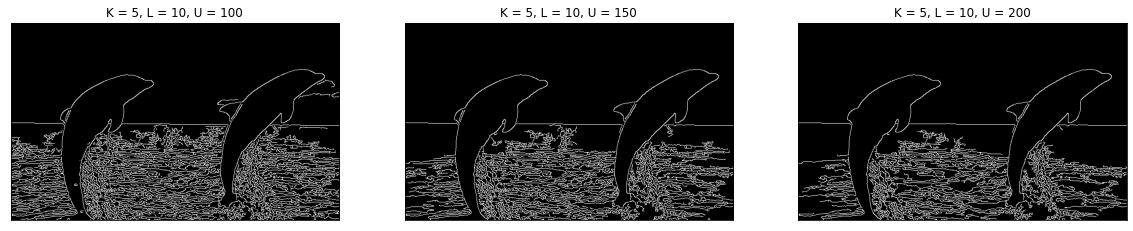

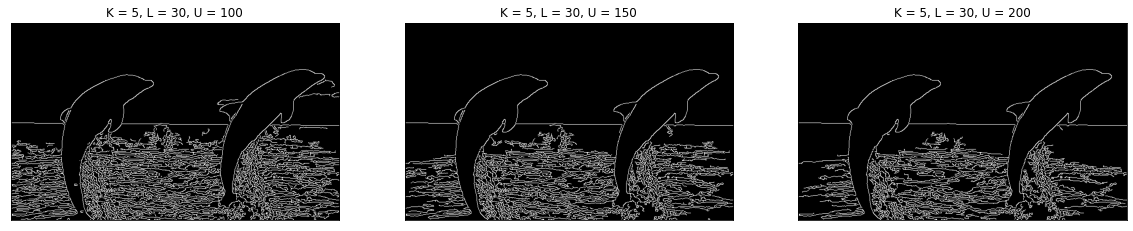

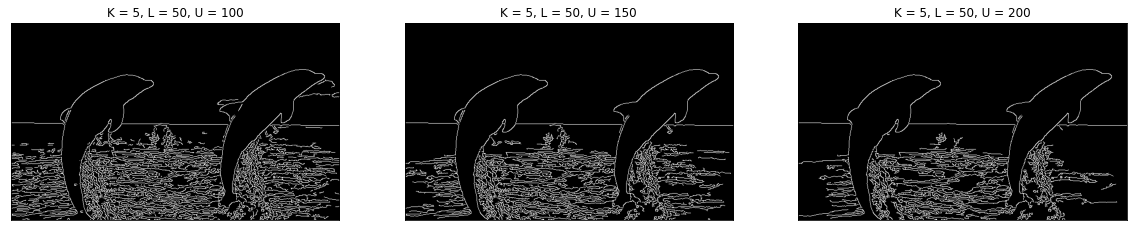

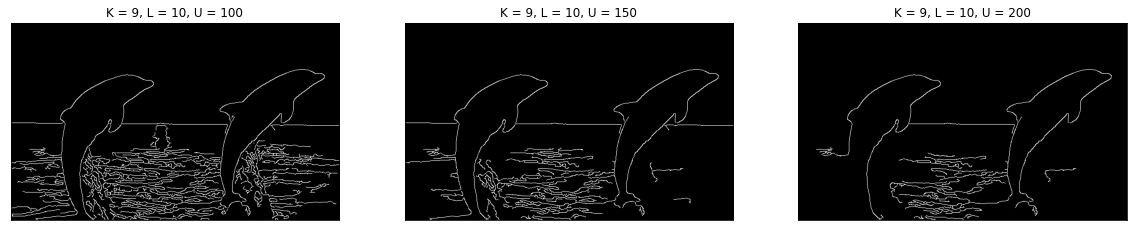

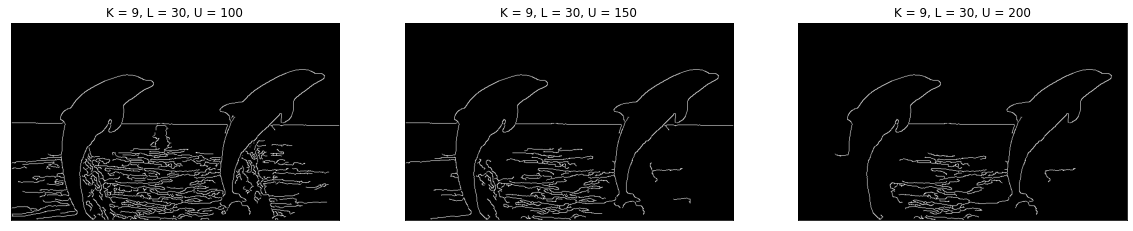

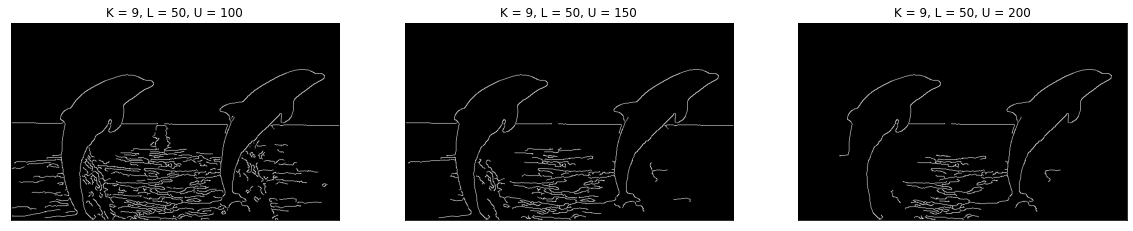

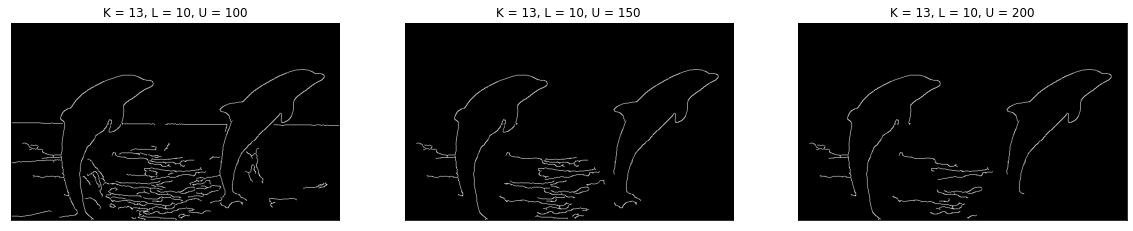

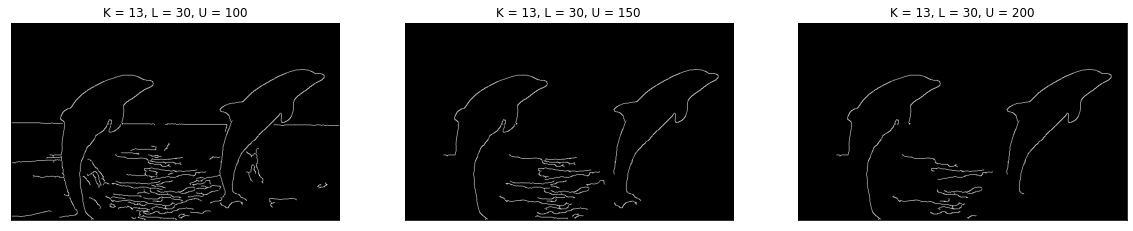

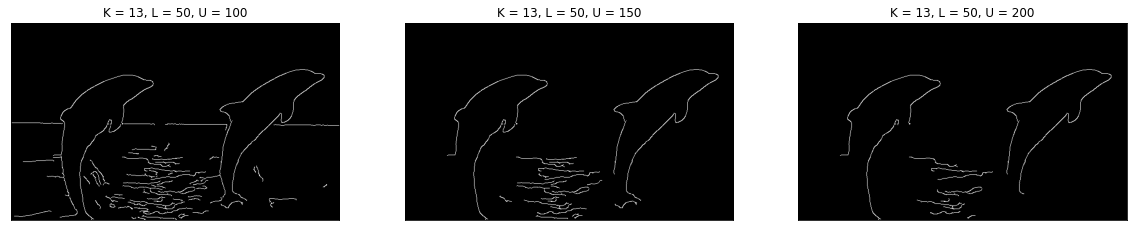

In [16]:
# read image and convert to gray scale
dolphin = img.imread(path + 'dolphin.jpg')
gray4_2 = cv2.cvtColor(dolphin, cv2.COLOR_RGB2GRAY)

# define a method to run gaussian blur filter and canny edge detector
def cannyFilter(image, K, L, H):
 img_gauss = cv2.GaussianBlur(image, (K, K), 0)
 img_edge = cv2.Canny(img_gauss, L, H)
 return img_edge

#define hyper parameters
K = (5, 9, 13)
L = (10, 30, 50)
H = (100, 150, 200) 

# loop over the hyper parameters such that there are 3x3x3 combinations

for k in K:
  #for each value of K change value of K
  for l in L:
    # i is used as index  to plot images 
    i = 1
    plt.figure(figsize=(20, 20)) 
    
    # for each value of L change value of L
    for h in H:
      #call method above
      edge_image = cannyFilter( gray4_2, k, l, h)
      
      #plot images
      imagepos = int('13' + str(i))
      plt.subplot(imagepos)
      #label plots
      plt.imshow(edge_image, cmap="gray")
      plt.title("K = " + str(k) + ", L = " + str(l) + ", U = " + str(h) ), plt.xticks([]), plt.yticks([])
      i = i+1



### 4.3 Comment on how changing values of each hyper-parameters (K,L,U) effects the overall edge detection. Is there is any relationship between any hyper-parameters? ###

As the value of K  increases, we remove unwanted edges caused by noise, however, as K increases significantly we start to lose edges too and the edges become wide.
As the value of L increases, the links between prominent edges start to disappear.
As we increase the value of less, less edges are formed and only the harder edges are detected. 

For an increasing kernel size K, you need a lower value of L and K to get a similar result. 

### 4.4 Find a value of each hyper-parameter such that only dolphin edges are detected. (Figure 4(b)) ###

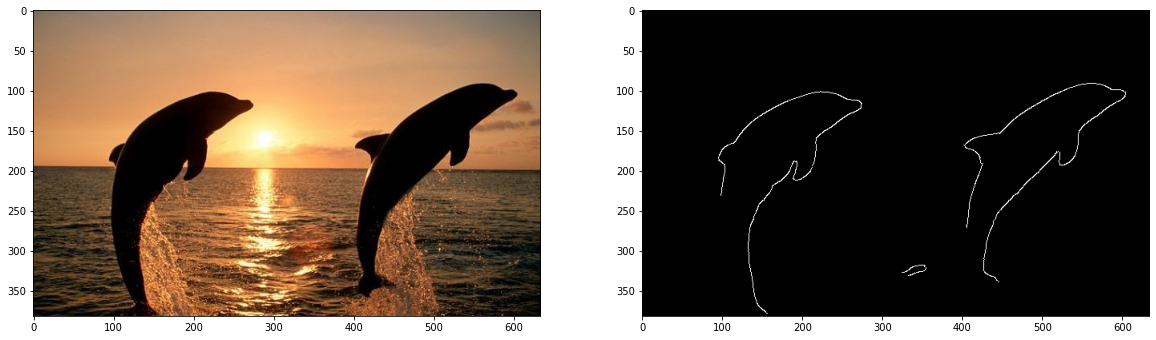

In [17]:
dolphin = img.imread(path + 'dolphin.jpg')
gray4_2 = cv2.cvtColor(dolphin, cv2.COLOR_RGB2GRAY)


image = cannyFilter(gray4_2, 15, 100, 200)
plt.figure(figsize=(20, 20)) 
plt.subplot(121)
plt.imshow(dolphin);
plt.subplot(122)
plt.imshow(image , cmap = 'gray');


## 5. Harris Corner Detection ##


In [155]:
# This section incluldes a method to calculate Cornerness function response, and non-maximna supression.
#These method are then used in defining Harris Corner Detector

#Define a method that return an array of Cornerness function response on each pixel location 
#The fuction cornerness_function_response does the following:
  #2. Compute Square of derivatives
  #3. Apply Gaussian Filtering on the output
  #4. Get Cornerness function response (Determinant(H)-kTrace(H)2)
  
def cornerness_function_response(I_x, I_y,k):

  cfs = np.zeros(I_x.shape)
  Ix2 = I_x*I_x
  Iy2 = I_y*I_y
  Ixy = I_x*I_y  
  # Apply  Gaussian smoothing to output
  Ix2 = cv2.GaussianBlur(Ix2, (7, 7), 2)
  Iy2 = cv2.GaussianBlur(Iy2, (7, 7), 2)
  Ixy = cv2.GaussianBlur(Ixy, (7, 7), 2)
  
  dimensions = I_x.shape
  H = np.zeros((2,2))
  for i in range(dimensions[0]):
    for j in range(dimensions[1]):
      H = np.array( [ [Ix2[i,j], Ixy[i,j]] ,
                    [Ixy[i,j], Iy2[i,j] ] ] )

      r = np.linalg.det(H) - k*(np.trace(H)**2)
      cfs[i, j] = r        
  
  return cfs  

#define a method for non-maxima supression
def non_max_suppression(image):
    
    M, N = image.shape
    Z = np.zeros((M,N), dtype=np.int32)
    low = np.amin(image) 
    max = np.amax(image)
    for i in range(1,M-1): # Note that we are leaving 1 pixel gap on each side of image
        for j in range(1,N-1): 
          neighbour = np.zeros((3,3))         
          neighbour[0,0] = image[i-1, j-1]        #create a matrix that contains values of all nieghbouring pixels
          neighbour[0,1] = image[i-1, j]  
          neighbour[0,2] = image[i-1, j+1]  
          neighbour[1,0] = image[i, j-1]  
          neighbour[1,1] = image[i , j]  
          neighbour[1,2] = image[i, j+1]  
          neighbour[2,0] = image[i+1, j-1]  
          neighbour[2,1] = image[i+1, j]  
          neighbour[2,2] = image[i+1, j+1]    

          # if pixel magnitude is higher than both its neighbour than keep     
          if (image[i,j] >= neighbour.all()):
            Z[i,j] = image[i,j]
          else:
            Z[i,j] = low
    return Z
  
def HarrisCorners(image, GaussinaKernelSize, sobelKernelSize, HarrisK, thres):

  #Apply a Gaussian blur smoothing
  image_gauss = cv2.GaussianBlur(image, (GaussinaKernelSize, GaussinaKernelSize), 0)

  # 1. Find the gradient
  I_x = cv2.Sobel(image_gauss, cv2.CV_64F, 1, 0, ksize=sobelKernelSize)
  I_y = cv2.Sobel(image_gauss, cv2.CV_64F, 0, 1, ksize=sobelKernelSize)
 
  #The fuction cornerness_function_response does the following:
  #2. Compute Square of derivatives
  #3. Apply Gaussian Filtering on the output
  #4. Get Cornerness function response (Determinant(H)-kTrace(H)2), where
  
  cfs_array = cornerness_function_response(I_x, I_y, HarrisK)
  
  #perform non-maxima suppression
  cfs_array = non_max_suppression(cfs_array)
  
  # normalize corner map [0,10]
  # cv2.normalize(src, dst, alpha, beta, norm_type)
  cv2.normalize(cfs_array, cfs_array, 0, 10, cv2.NORM_MINMAX)


  # list all points higher than threshold
  corners = np.where(cfs_array >= thres)

  return corners

    

###4.1 Checkerboard###

Text(0.5, 1.0, 'Harris Image')

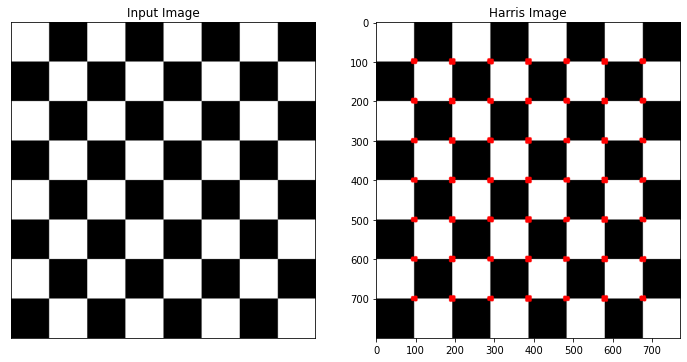

In [158]:
# load image as grayscale
checkerboard = cv2.imread(path + "checkerboard.png")
gray5 = cv2.cvtColor(checkerboard, cv2.COLOR_RGB2GRAY)

#image to display
img_disp = checkerboard.copy()

#HarrisCorners(image, GaussinaKernelSize, sobelKernelSize, HarrisK, thres)
#Threshold should be between 0 and 10 as corners are normalised bwtween 0 and 10
loc = HarrisCorners(gray5, 3, 3, 0.05, 8)

# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 5, (255,0,0), -1)

# display images
plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(checkerboard)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Image")

### Observe and report affect of changing threshold values ###
The threshold values are normalised between 0 and 10.
At the threshold below 5 (50%), the entire board appear red.At a threshold value between 5 and 8, a cross pattern appeards.  Therfore we choose 8 as the threshold value. After 8, some corners start to disappear.


### 4.2 Shapes ###

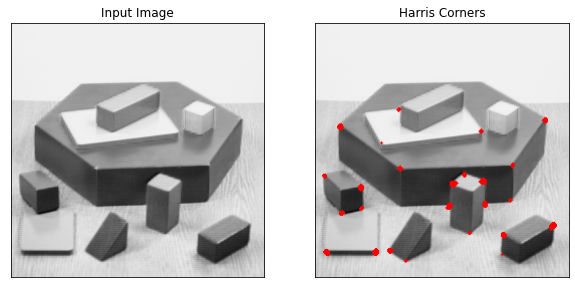

In [162]:
# load image as grayscale
shapes = cv2.imread(path + "shapes.png")
gray5 = cv2.cvtColor(shapes, cv2.COLOR_RGB2GRAY)

#image to display
img_disp = shapes.copy()

#HarrisCorners(image, GaussinaKernelSize, sobelKernelSize, HarrisK, thres)
loc = HarrisCorners(gray5, 3, 3, 0.05, 5.0000000000000001)

# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 1, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(shapes)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()


## Try different value of thresholds and report your observations.##

For a threshold value of less than 5, the entire picture is colored red (indicating that too many edges are detected)
For threshold values between 5.0 and 5.1, many edges are detected but some edges are distorted because of multiple detection.
For threshold values after 5.1, we lose the distortion but only the prominent edges are detected.
We lose all edges at threshold value of 9.

### 4.3 Google Face thumbnail collection ###

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


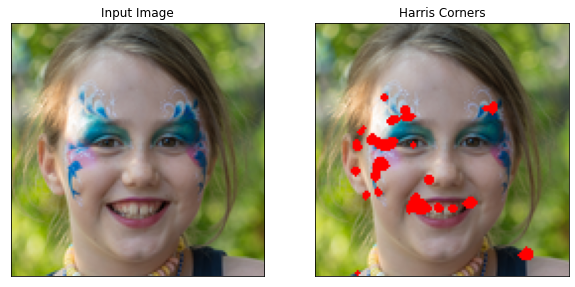

In [216]:
# load image as grayscale
face = img.imread(path + "13171.png")
gray5 = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)

#image to display
img_disp = face.copy()

#HarrisCorners(image, GaussinaKernelSize, sobelKernelSize, HarrisK, thres)
loc = HarrisCorners(gray5, 3, 5, 0.06, 5.5)
# loop though point
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 1, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(face)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

 ### Try different value of thresholds and report your observations.

 For a threshold value f less than 5, too many corners are detected. 
 For a threshold value of more than 8, very few corners are selected.
 The threshols is therfore kept at 5.5.
